<a href="https://colab.research.google.com/github/Aditi15091999/Yit_internship_projects/blob/master/LR_and_KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1:Loading the data and creating the dataframe**

In [0]:
import pandas as pd
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


**STEP2:Preprocessing or filtering of data**

**Data analysis**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [0]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [0]:
df.shape

(891, 8)

In [0]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [0]:
df.tail(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
881,0,3,male,33.0,0,0,7.8958,S
882,0,3,female,22.0,0,0,10.5167,S
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
890,0,3,male,32.0,0,0,7.7500,Q


In [0]:
Gender=df['Sex'].values
Gender

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [0]:
import numpy as np
fname,fcount=np.unique(Gender,return_counts=True)
print(f'{fname[0]}:{fcount[0]}')
print(f'{fname[1]}:{fcount[1]}')

female:314
male:577


In [0]:
Sur=df['Survived']
Sur

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [0]:
import numpy as np
fval,fnum=np.unique(Sur,return_counts=True)
print(f'{fval[0]}:{fnum[0]}')
print(f'{fval[1]}:{fnum[1]}')

0:549
1:342


**Filing the missing values of age**

In [0]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [0]:
df['Embarked'].fillna('S',inplace=True)

**Checking for the missing values**

In [0]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**STEP3:Data Visualization**

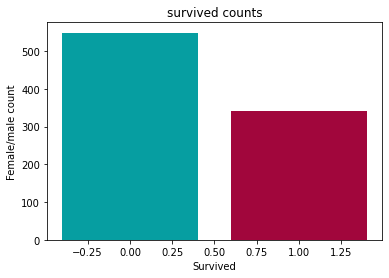

In [0]:
import matplotlib.pyplot as plt
plt.bar(fval,fnum,color=['#069ea1','#a1063c'])
plt.xlabel('Survived')
plt.ylabel('Female/male count')
plt.title('survived counts')
plt.show()

In [0]:
import numpy as np
svar,unic = np.unique(df['Age'],return_counts=True)
print(svar)
print(unic)

[ 0.42        0.67        0.75        0.83        0.92        1.
  2.          3.          4.          5.          6.          7.
  8.          9.         10.         11.         12.         13.
 14.         14.5        15.         16.         17.         18.
 19.         20.         20.5        21.         22.         23.
 23.5        24.         24.5        25.         26.         27.
 28.         28.5        29.         29.69911765 30.         30.5
 31.         32.         32.5        33.         34.         34.5
 35.         36.         36.5        37.         38.         39.
 40.         40.5        41.         42.         43.         44.
 45.         45.5        46.         47.         48.         49.
 50.         51.         52.         53.         54.         55.
 55.5        56.         57.         58.         59.         60.
 61.         62.         63.         64.         65.         66.
 70.         70.5        71.         74.         80.        ]
[  1   1   2   2   1   7  

In [0]:
cg=df.groupby('Age').mean()
cg

,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
0.42,1.0,3.0,0.0,1.0,8.5167
0.67,1.0,2.0,1.0,1.0,14.5000
0.75,1.0,3.0,2.0,1.0,19.2583
0.83,1.0,2.0,0.5,1.5,23.8750
0.92,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...
70.00,0.0,1.5,0.5,0.5,40.7500
70.50,0.0,3.0,0.0,0.0,7.7500
71.00,0.0,1.0,0.0,0.0,42.0792


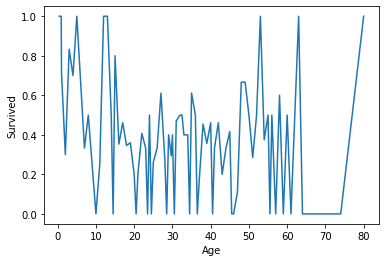

In [0]:
import matplotlib.pyplot as plt
cg['Survived'].plot.line('color=g')
plt.ylabel('Survived')
plt.show()

 **STEP4:Divide into input and output**

**Convert values of embarked and sex into numeric value**

In [0]:
Sex={'female':1,'male':2}
df.Sex = [Sex[item] for item in df.Sex]


In [0]:
Embarked={'S':0,'C':1,'Q':2}
df.Embarked=[Embarked[item]for item in df.Embarked]

In [0]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,2,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,2,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,2,26.000000,0,0,30.0000,1


In [0]:
x=df.iloc[:,[1,2,3,7]].values
y=df.iloc[:,0].values

**Step5:Train and Test variables**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_train)
print(x_test)

[[ 3.          2.         34.          0.        ]
 [ 2.          1.         27.          0.        ]
 [ 2.          1.         27.          1.        ]
 ...
 [ 3.          2.         29.69911765  0.        ]
 [ 3.          2.         43.          0.        ]
 [ 1.          2.         35.          1.        ]]
[[ 3.          2.          4.          0.        ]
 [ 3.          2.         28.          0.        ]
 [ 3.          2.         29.69911765  2.        ]
 [ 3.          2.         21.          0.        ]
 [ 3.          2.         21.          0.        ]
 [ 1.          1.         16.          0.        ]
 [ 1.          1.         35.          0.        ]
 [ 3.          1.         26.          0.        ]
 [ 1.          1.         39.          1.        ]
 [ 1.          2.         29.69911765  0.        ]
 [ 3.          2.         26.          0.        ]
 [ 2.          2.         23.          0.        ]
 [ 1.          1.         36.          0.        ]
 [ 3.          2.        

In [0]:
print(x_train.shape)
print(x_test.shape)

(668, 4)
(223, 4)


**STEP6:Normalization**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Building machine learning model using Logistic Regression**

**STEP7:Run a clasifier**

In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

**STEP8:Fit the model**

In [0]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**STEP9:Predicting the output**

In [0]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1])

In [0]:
#Real output
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1])

**STEP10:Accuracy score and Confusion matrix**

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

77.13004484304933

**Checking probability**

In [0]:
test = [[2,1,30,2]]
test = scaler.transform(test) 
model.predict_proba(test)

array([[0.1216562, 0.8783438]])

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[119,  19],
       [ 32,  53]])

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       138
           1       0.74      0.62      0.68        85

    accuracy                           0.77       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.77      0.77      0.77       223



**Building a machine learning model using K Nearest Neighbours (KNN)**

**STEP7:Run a clasifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors =50 ,metric = 'euclidean')

**STEP8:Fit the model**

In [0]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

**STEP9:Predicting the output**

In [0]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [0]:
#Real output
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1])

**STEP10:Accuracy score and Confusion matrix**

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

78.02690582959642

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[128,  10],
       [ 39,  46]])

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       138
           1       0.82      0.54      0.65        85

    accuracy                           0.78       223
   macro avg       0.79      0.73      0.75       223
weighted avg       0.79      0.78      0.77       223



*Accuracy using Logistic Regression is 77.13004484304933*
   
   
*Accuracy using KNN is 78.02690582959642*
